In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
seed = 2022

In [2]:
csv_file = "cleaned_EThOS_CSV_202210.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

/var/folders/l7/bnn1j6bs3bqfskq2jlq55yh80000gr/T/ipykernel_91356/740333908.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="ISO-8859-2")


,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,


## Create new column concatenating Title and Abstract

In [52]:
df["Text"] = df["Title"] + ' ' + df["Abstract"]

## Tokenizing the text using Spacy

In [56]:
import spacy
nlp = spacy.load('en_core_web_md')

In [57]:
docs = list(nlp.pipe(df["Text"], n_process=6))

In [59]:
df["Tokens"] = [[token.lemma_.lower() for token in doc
                 if not token.is_stop and token.is_alpha and token.is_ascii]
                for doc in docs]

In [63]:
df.head()

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Text,Tokens
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Computation and measurement of turbulent flow ...,"[computation, measurement, turbulent, flow, id..."
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Prolactin and growth hormone secretion in norm...,"[prolactin, growth, hormone, secretion, normal..."
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Influence of strain fields on flame propagatio...,"[influence, strain, field, flame, propagation,..."
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...,"Connectivity, flow and transport in network mo...","[connectivity, flow, transport, network, model..."
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,The theory and implementation of a high qualit...,"[theory, implementation, high, quality, pulse,..."


Want to also work with Bigrams as only considering individual words can miss some things. Could maybe go further but will see what this does...

In [9]:
df["Tokens_with_Bigrams"] = [toks + [toks[i] + '-' + toks[i+1] for i in range(len(toks)-1)]
                             if len(toks) > 1 else toks
                             for toks in df["Tokens"]]

KeyError: 'Tokens'

In [85]:
df.to_pickle("../EThOS_CSV_202210_with_tokens.pkl")

## Using Gensim for LDA

In [ ]:
csv_file = "EThOS_CSV_202210_with_tokens.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

In [147]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LdaMulticore, CoherenceModel, LsiModel, HdpModel

With Latent Dirichlet Allocation (LDA), the goal is to learn the topic mix in each document, and the word mix in each document. So we first define the number of topics, which has a distribution over the words in the dictionary. We also can obtain a distribution of topics for each document. We can get `gensim` to do this for us.

To perform LDA, I need to obtain a dictionary (give each token a unique ID), and a corpus which contains each ID and its frequency.

Here, we also just focus on a particular subject (Computer Science)

In [176]:
comp_sci_df = df[df["Subject Discipline"] == "Computer Science"]
tokens = comp_sci_df["Tokens_with_Bigrams"]

In [177]:
# maps each word to their unique ID
dictionary = Dictionary(tokens)

In [178]:
len(dictionary)

594661

Here, I want to filter out any low-frequency and high-frequency tokens. In particular, I take out any words that appear in less than 5 documents and any words that appear in more than 50% of the documents. To reduce computation, we also only keep the 100000 most frequent tokens after those removals.

In [179]:
dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=None)

In [180]:
len(dictionary)

33360

In [181]:
sum([tok.count('thesis') for tok in tokens]) / len(tokens)

0.5986389834039303

In [185]:
sum([tok.count('system') for tok in tokens]) / len(tokens)

0.9902090132629678

In [182]:
corpus = [dictionary.doc2bow(doc) for doc in tokens]

In [190]:
dictionary

Implement LDA with various number of topics and compute it's _coherence score_ (value between $0$ and $1$).

i: 1 || Score: 0.6540012554007414
i: 2 || Score: 0.6365881302706393
i: 3 || Score: 0.6325665975901189
i: 4 || Score: 0.6326292165189437
i: 5 || Score: 0.6249367110055484
i: 6 || Score: 0.6213872194789567
i: 7 || Score: 0.6030184475857175
i: 8 || Score: 0.6075472624781378
i: 9 || Score: 0.6231297641458338
i: 10 || Score: 0.617363139690152
i: 11 || Score: 0.624208631920234
i: 12 || Score: 0.6173774847736508
i: 13 || Score: 0.6126924322310952
i: 14 || Score: 0.6113724347804703
i: 15 || Score: 0.6076449489243234
i: 16 || Score: 0.6118835456797758
i: 17 || Score: 0.6043500786876335
i: 18 || Score: 0.61294321806786
i: 19 || Score: 0.599206156768417
i: 20 || Score: 0.5982687860052383


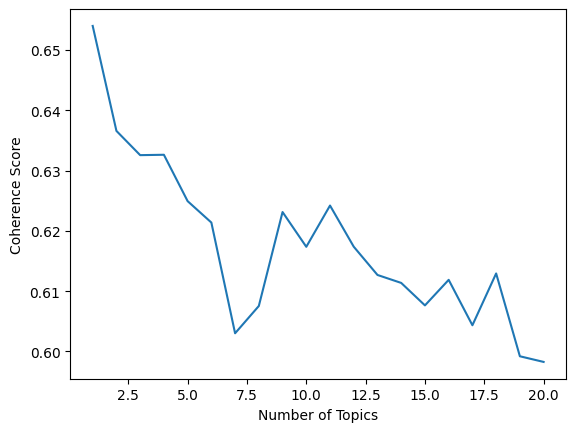

In [149]:
topics = list(range(1,21))
score = []
for i in topics:
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             iterations=10,
                             num_topics=i,
                             passes=10,
                             workers=6,
                             random_state=100)
    cm = CoherenceModel(model=lda_model,
                        texts=df["Tokens_with_Bigrams"],
                        corpus=corpus,
                        dictionary=dictionary,
                        coherence='c_v')
    cs = cm.get_coherence()
    score.append(cs)
    print(f"i: {i} || Score: {cs}")

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [183]:
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         iterations=100,
                         num_topics=5,
                         workers=4,
                         passes=100)

In [184]:
lda_model.print_topics(-1)

[(0,
  '0.018*"system" + 0.013*"model" + 0.013*"software" + 0.011*"language" + 0.009*"program" + 0.007*"base" + 0.006*"design" + 0.006*"development" + 0.005*"approach" + 0.005*"programming"'),
 (1,
  '0.012*"system" + 0.010*"design" + 0.009*"user" + 0.008*"problem" + 0.007*"research" + 0.006*"base" + 0.006*"agent" + 0.006*"environment" + 0.005*"interaction" + 0.005*"study"'),
 (2,
  '0.010*"model" + 0.009*"method" + 0.009*"image" + 0.009*"algorithm" + 0.007*"base" + 0.007*"problem" + 0.007*"datum" + 0.006*"feature" + 0.005*"approach" + 0.005*"propose"'),
 (3,
  '0.015*"network" + 0.011*"service" + 0.009*"application" + 0.009*"system" + 0.007*"performance" + 0.007*"resource" + 0.006*"cloud" + 0.006*"datum" + 0.005*"computing" + 0.005*"base"'),
 (4,
  '0.011*"datum" + 0.010*"information" + 0.010*"system" + 0.009*"network" + 0.007*"research" + 0.007*"model" + 0.006*"study" + 0.005*"analysis" + 0.005*"security" + 0.005*"neural"')]

## HDP

Hierarchical Dirichlet Process (HDP) is an unsupervised topic model which figures out the number of topics on its own.

In [152]:
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_model.show_topics()

[(0,
  '0.009*system + 0.007*model + 0.006*thesis + 0.006*base + 0.005*datum + 0.004*problem + 0.004*network + 0.004*approach + 0.004*method + 0.004*application + 0.004*design + 0.004*research + 0.003*user + 0.003*information + 0.003*technique + 0.003*algorithm + 0.003*use + 0.003*time + 0.003*study + 0.003*propose'),
 (1,
  '0.012*system + 0.007*model + 0.006*thesis + 0.006*base + 0.005*network + 0.004*design + 0.004*problem + 0.004*application + 0.004*approach + 0.004*research + 0.004*datum + 0.004*information + 0.003*use + 0.003*user + 0.003*process + 0.003*method + 0.003*technique + 0.003*study + 0.003*software + 0.003*time'),
 (2,
  '0.010*system + 0.007*model + 0.006*base + 0.005*thesis + 0.005*problem + 0.004*datum + 0.004*approach + 0.004*design + 0.004*technique + 0.004*method + 0.004*software + 0.004*language + 0.004*network + 0.004*information + 0.004*time + 0.003*application + 0.003*use + 0.003*research + 0.003*process + 0.003*development'),
 (3,
  '0.008*system + 0.004*bas

Why are words like 'system', 'thesis', 'method' coming up in the topics? I thought we were meant to delete these from the dictionary?

Going to remove them and try again and use TFIDF stuff...

## Using BERTopic

In [39]:
df["Text"] = df["Title"] + ' : ' + df["Abstract"]

In [40]:
df["Title"].iloc[2]

'Influence of strain fields on flame propagation'

In [41]:
df["Abstract"].iloc[2]

'Flame propagation can be highly influenced by the presence of strain fields. Two regimes of turbulent flame propagation can be identified: (a) a strain-dominated regime which occurs when the smallest eddies are larger than the laminar flame thickness; and (b) a mixing-dominated regime found when the smallest eddies are smaller than the laminar flame thickness. Therefore, flame propagation in a low to moderate intensity turbulent medium, and initial stages of flame growth from a point ignition source, may be dominated by straining effects. This is because in these cases it is very likely that the laminar flame thickness is smaller than the Kolmogorov length scale, which is a measure of the smallest structures of the turbulence. In this dissertation theoretical and experimental work is reported on the influence of a uniform strain field (together with heat loss) on laminar flame propagation. The theoretical results show that, in general, the laminar burning velocity decreases when the s

In [42]:
df["Text"].iloc[2]

'Influence of strain fields on flame propagation : Flame propagation can be highly influenced by the presence of strain fields. Two regimes of turbulent flame propagation can be identified: (a) a strain-dominated regime which occurs when the smallest eddies are larger than the laminar flame thickness; and (b) a mixing-dominated regime found when the smallest eddies are smaller than the laminar flame thickness. Therefore, flame propagation in a low to moderate intensity turbulent medium, and initial stages of flame growth from a point ignition source, may be dominated by straining effects. This is because in these cases it is very likely that the laminar flame thickness is smaller than the Kolmogorov length scale, which is a measure of the smallest structures of the turbulence. In this dissertation theoretical and experimental work is reported on the influence of a uniform strain field (together with heat loss) on laminar flame propagation. The theoretical results show that, in general,

Let's only consider computer science for now:

In [75]:
cs_df = df[df["Subject Discipline"]=='Computer Science'].reset_index()

In [58]:
cs_df["Date"] = pd.to_datetime(cs_df["Date"])

In [76]:
cs_df.head()

,index,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Text
0,13,13,A methodology for automated design of computer...,,"Bennett, J. P.",https://isni.org/isni/0000000134590959,,University of Cambridge,https://isni.org/isni/0000000121885934,1987,Thesis (Ph.D.),,Computer Science,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,A methodology for automated design of computer...
1,14,14,Reasoning about the function and timing of int...,,"Leeser, Miriam Ellen",https://isni.org/isni/0000000136076953,,University of Cambridge,https://isni.org/isni/0000000121885934,1987,Thesis (Ph.D.),The structure of circuits is specified with Pr...,Computer Science,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Reasoning about the function and timing of int...
2,57,57,Learning to classify from temporal data in the...,,"Black, Michaela",,,Ulster University,https://isni.org/isni/0000000105519715,2002,Thesis (Ph.D.),,Computer Science,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Learning to classify from temporal data in the...
3,71,71,Rational agents and the processes and states o...,,"Paurobally, Shamimabi",,,Imperial College London,https://isni.org/isni/0000000121889740,2002,Thesis (Ph.D.),,Computer Science,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Rational agents and the processes and states o...
4,78,78,Optical packet networking using optical time d...,,"Gao, Ruixin",https://isni.org/isni/0000000134879699,,Sheffield Hallam University,https://isni.org/isni/000000010303540X,2003,Thesis (Ph.D.),Growing demands for capacity have stimulated t...,Computer Science,"Ghassemlooy, Z. ; Ball, Peter ; Swift, Graham",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://shura.shu.ac.uk/19219/,Optical packet networking using optical time d...


In [54]:
len(cs_df)

14401

In [43]:
from bertopic import BERTopic

Choosing the representation model for BERTopic (i.e. how we choose the final set of words that describe a collection of documents):

In [150]:
rep_model_choice = "keybert"

if rep_model_choice == "openai":
    import openai
    from bertopic.representation import OpenAI
    openai.api_type = 'azure'
    openai.api_key = os.environ["OPENAI_API_KEY"]
    representation_model = OpenAI(model="gpt-3.5-turbo", chat=True)
elif rep_model_choice == "hf":
    from bertopic.representation import TextGeneration
    representation_model = TextGeneration("gpt2")
elif rep_model_choice == "keybert":
    from bertopic.representation import KeyBERTInspired
    representation_model = KeyBERTInspired()
else:
    raise ValueError
    
representation_model

KeyBERTInspired()

Choosing the dimensionality reduction model:

In [151]:
# logical value to determine whether or not to dimension reduce (using UMAP)
skip_umap = False

if skip_umap:
    from bertopic.dimensionality import BaseDimensionalityReduction
    umap_model = BaseDimensionalityReduction()
else:
    from umap import UMAP
    umap_model = UMAP(n_neighbors=15,
                      n_components=5,
                      min_dist=0.0,
                      metric='cosine')
    
umap_model

UMAP(metric='cosine', min_dist=0.0, n_components=5)

Choosing the sentence-transformer to use:

In [152]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-MiniLM-L12-v2")

In [170]:
# create and fit topic model
topic_model = BERTopic(min_topic_size=40,
                       embedding_model=sentence_model,
                       umap_model=umap_model,
                       representation_model=representation_model)
topics, probs = topic_model.fit_transform(cs_df["Text"])

In [171]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4833,-1_applications_software_environment_systems,"[applications, software, environment, systems,...",[An approach to implementing cloud service ori...
1,0,1159,0_images_recognition_segmentation_vision,"[images, recognition, segmentation, vision, im...",[Learning to reconstruct and segment 3D object...
2,1,842,1_security_secure_encryption_cryptographic,"[security, secure, encryption, cryptographic, ...",[Optimising information security decision maki...
3,2,641,2_routing_networking_bandwidth_congestion,"[routing, networking, bandwidth, congestion, p...",[Optimisation of traffic steering for heteroge...
4,3,562,3_processors_parallel_parallelism_processor,"[processors, parallel, parallelism, processor,...",[Achieving parallel performance in scientific ...
5,4,471,4_nlp_corpus_linguistic_classification,"[nlp, corpus, linguistic, classification, lexi...",[Logical-linguistic model and experiments in d...
6,5,453,5_specification_logics_logic_semantics,"[specification, logics, logic, semantics, prog...",[Logic programming : operational semantics and...
7,6,444,6_control_controllers_controller_optimal,"[control, controllers, controller, optimal, pa...",[The optimal control of linear distributed par...
8,7,438,7_software_modelling_application_specification,"[software, modelling, application, specificati...",[Software engineering process modelling analys...
9,8,352,8_heuristics_heuristic_evolutionary_algorithms,"[heuristics, heuristic, evolutionary, algorith...",[Theoretical and empirical evaluation of diver...


In [172]:
topic_model.get_topic_info(0)["Representation"][0]

['images',
 'recognition',
 'segmentation',
 'vision',
 'image',
 'retrieval',
 'detection',
 'objects',
 'visual',
 'imaging']

In [173]:
topic_model.get_topic_info(1)["Representation"][0]

['security',
 'secure',
 'encryption',
 'cryptographic',
 'authentication',
 'attacks',
 'cloud',
 'protection',
 'privacy',
 'attack']

In [174]:
topic_model.get_topic_info(2)["Representation"][0]

['routing',
 'networking',
 'bandwidth',
 'congestion',
 'protocols',
 'tcp',
 'network',
 'packet',
 'multicast',
 'wsns']

In [175]:
cs_df["Date"] = cs_df["Date"].astype(int)

In [176]:
topics_over_time = topic_model.topics_over_time(docs=cs_df["Text"],
                                                timestamps=cs_df["Date"])

In [177]:
topics_over_time

,Topic,Words,Frequency,Timestamp
0,-1,"storage, memory, computing, binary, tubes",1,1948
1,-1,"digital, computation, mathematics, engineering...",2,1953
2,6,"nonlinear, control, stability, systems, contro...",3,1960
3,-1,"digital, computing, software, systems, computer",2,1961
4,6,"nonlinear, control, linear, controller, linearity",2,1961
...,...,...,...,...
1491,17,"hardware, computer, reprap, software, free",1,2021
1492,21,"quantum, electron, ion, trapped, qubits",1,2021
1493,22,"fairness, cloud, allocation, unfair, scheduling",1,2021
1494,24,"visualisations, visualisation, visualization, ...",1,2021


In [178]:
import math
topics_over_time["Timestamp"] = topics_over_time["Timestamp"].apply(lambda x: math.floor(x))

In [179]:
topics_over_time["Timestamp"].value_counts()

2018    45
2017    45
2015    45
2013    45
2011    45
        ..
1960     1
1953     1
1962     1
1964     1
1948     1
Name: Timestamp, Length: 64, dtype: int64

In [180]:
topics_over_time[topics_over_time["Timestamp"]==2006]

,Topic,Words,Frequency,Timestamp
830,-1,"applications, application, xml, software, web",142,2006
831,0,"vision, detection, segmentation, camera, images",41,2006
832,1,"trust, trusted, security, authentication, secure",20,2006
833,2,"tcp, bandwidth, congestion, ip, protocols",33,2006
834,3,"multiprocessors, multiprocessor, processors, p...",12,2006
835,4,"ontology, semantic, tagging, categorisation, m...",14,2006
836,5,"haskell, refactorings, refactoring, programmin...",8,2006
837,6,"nonlinear, control, optimum, optimal, trajectory",11,2006
838,7,"software, specification, modelling, requiremen...",12,2006
839,8,"heuristics, optimization, optimisation, heuris...",13,2006


In [181]:
topic_model.get_topic_info(17)

,Topic,Count,Name,Representation,Representative_Docs
0,17,147,17_agile_developers_development_methodologies,"[agile, developers, development, methodologies...",[The influence of leadership on the adoption o...


In [182]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=-10)

## Just counting frequencies

Okay, lets not do topic modelling to find trends, let's just count frequencies of words and bigrams...

Every single word/bigram is going to be a row, and then we also record the year of the thesis. We use this to create a pivot table on the words and aggregate by decade. Focusing on just titles for now...